<a href="https://colab.research.google.com/github/AAguilarZ/Agenda/blob/main/Ejercicio_Sistemas_Recomendacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation Engine / System
## Proyecto: Recomendador de Repositorios de Github
### Usaremos Collaborative Filtering
Artículo completo en www.aprendemachinelearning.com

In [100]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import sklearn

In [101]:
df_users = pd.read_csv("users.csv")
df_repos = pd.read_csv("repos.csv")
df_ratings = pd.read_csv("ratings.csv")

In [102]:
df_users.head()

,userId,username,name
0,1,iris9112,Isabel Ruiz Buriticá
1,2,dianaclarke,Diana
2,3,nateprewitt,Nate Prewitt
3,4,oldani,Ordanis Sanchez
4,5,waflessnet,waflessnet


In [103]:
df_repos.head()

,repoId,title,categories,stars
0,1,airbnb / javascript,completar,NaN
1,2,kamranahmedse / developer-roadmap,Roadmap to becoming a web developer in 2019,85800.0
2,3,microsoft / vscode,Visual Studio Code,80855.0
3,4,torvalds / linux,Linux kernel source tree,78761.0
4,5,ytdl-org / youtube-dl,Command-line program to download videos from Y...,53909.0


In [47]:
df_ratings.head()

,userId,repoId,rating
0,1,1,2
1,1,2,3
2,1,3,4
3,1,4,5
4,1,5,3


In [104]:
n_users = df_ratings.userId.unique().shape[0]
n_items = df_ratings.repoId.unique().shape[0]
print (str(n_users) + ' users')
print (str(n_items) + ' items')

30 users
167 items


(array([94., 62., 66., 28., 40., 12., 14.,  8.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <BarContainer object of 8 artists>)

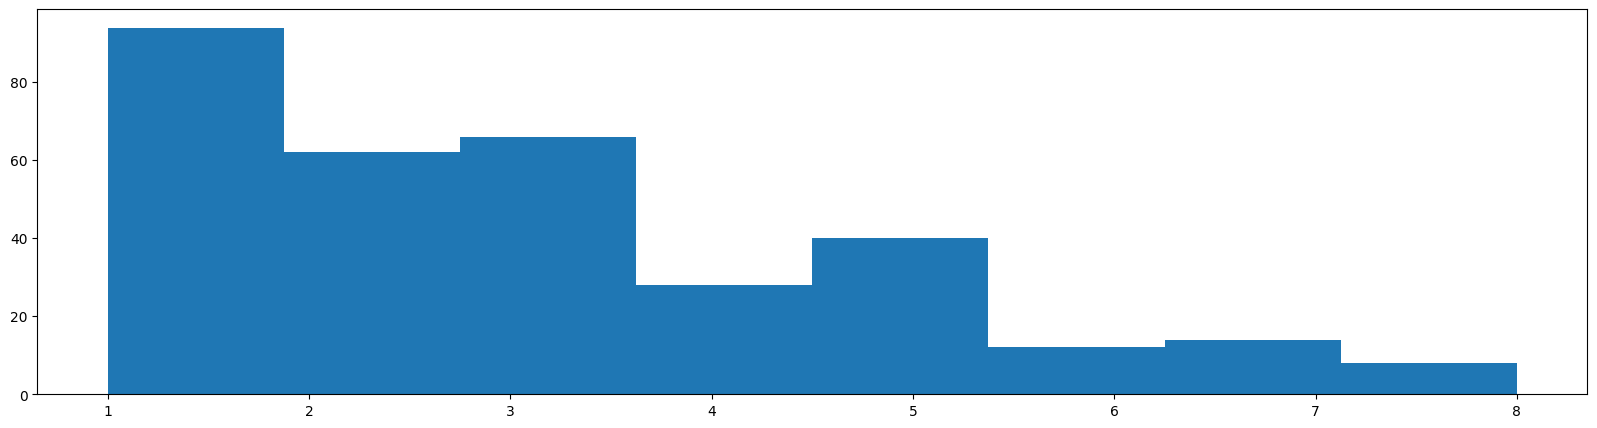

In [105]:
plt.hist(df_ratings.rating,bins=8)

In [106]:
df_ratings.groupby(["rating"])["userId"].count()

rating
1    94
2    62
3    66
4    28
5    40
6    12
7    14
8     8
Name: userId, dtype: int64

(array([94., 31., 22.,  7.,  8.,  2.,  2.,  1.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <BarContainer object of 8 artists>)

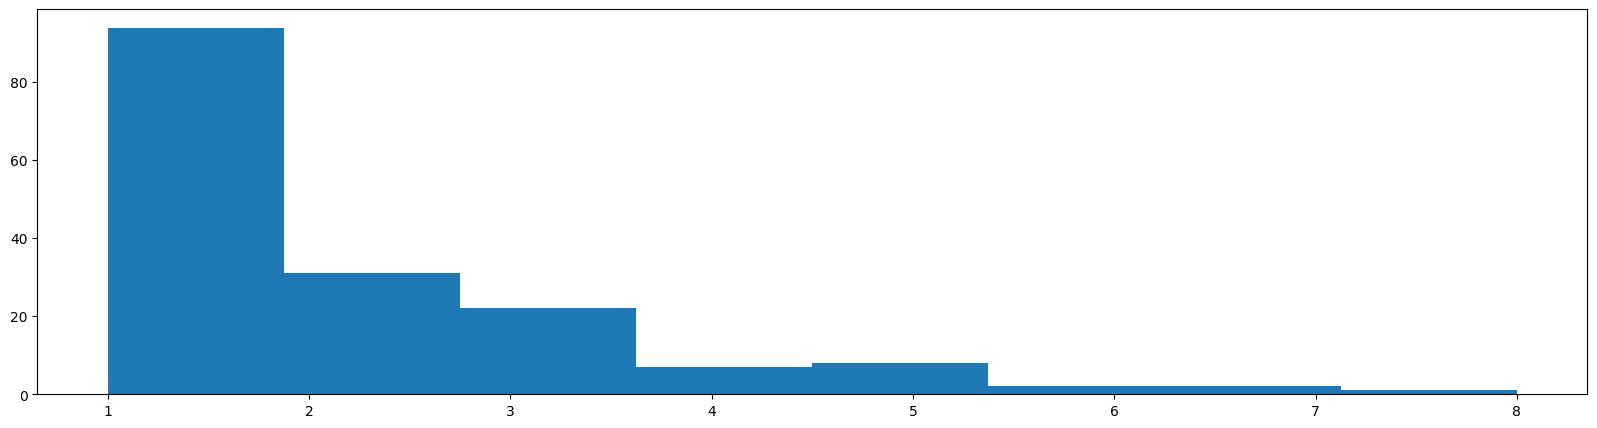

In [107]:
plt.hist(df_ratings.groupby(["repoId"])["repoId"].count(),bins=8)

# Método 1: User-Based

In [108]:
df_matrix = pd.pivot_table(df_ratings, values='rating', index='userId', columns='repoId').fillna(0)
df_matrix

repoId,1,2,3,4,5,6,7,8,9,10,...,158,159,160,161,162,163,164,165,166,167
userId,,,,,,,,,,,,,,,,,,,,,
1,2.0,3.0,4.0,5.0,3.0,1.0,5.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
ratings = df_matrix.values
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 6.43%


In [110]:
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.2, shuffle=False, random_state=42)

In [111]:
ratings_train.shape

(24, 167)

In [112]:
ratings_test.shape

(6, 167)

<ul>
<li>Matriz de similitud entre los usuarios (distancia del coseno -vectores-).</li>
<li>Predecir la valoración desconocida de un ítem i para un usuario activo u basandonos en la suma ponderada de todas las valoraciones del resto de usuarios para dicho ítem.</li>
<li>Recomendaremos los nuevos ítems a los usuarios según lo establecido en los pasos anteriores.</li>
</ul>

In [113]:
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings)

In [114]:
sim_matrix.shape

(30, 30)

In [115]:
# sim_matrix

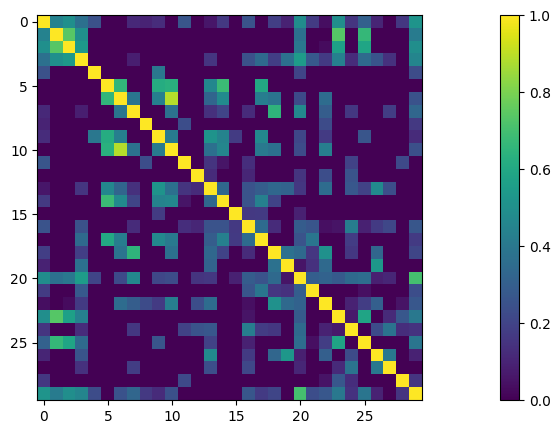

In [116]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(sim_matrix);
plt.colorbar()
plt.show()

In [117]:
#separar las filas y columnas de train y test
sim_matrix_train = sim_matrix[0:24,0:24]
sim_matrix_test = sim_matrix[24:30,24:30]
print(sim_matrix_train.shape)
print(sim_matrix_test.shape)

(24, 24)
(6, 6)


## Predicciones (las recomendaciones!)

In [118]:
users_predictions = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T

In [119]:
users_predictions.shape

(24, 167)

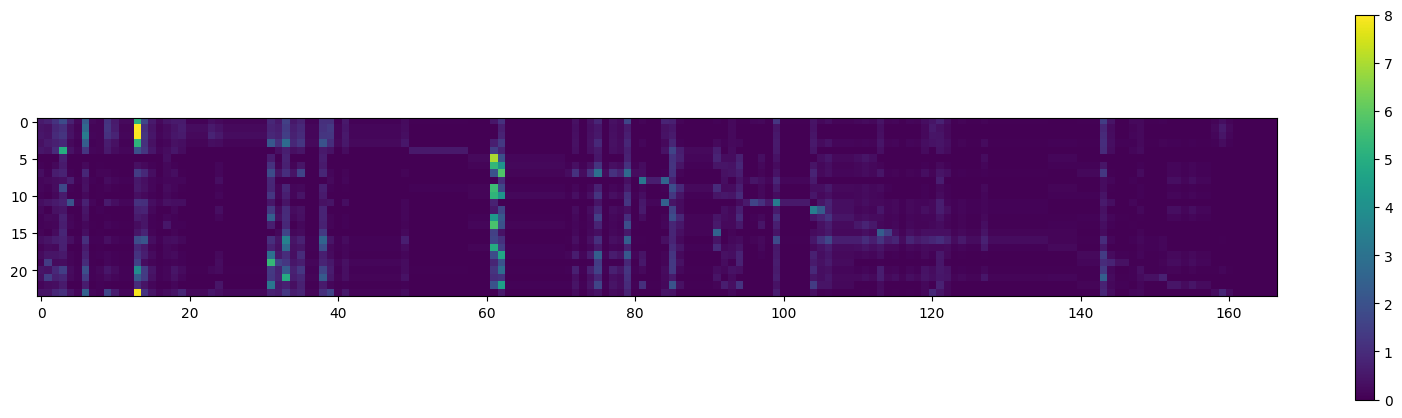

In [120]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(users_predictions);
plt.colorbar()
plt.show()

### Veamos un ejemplo

In [121]:
USUARIO_EJEMPLO = 'jbagnato' # debe existir en nuestro dataset de train!
data = df_users[df_users['username'] == USUARIO_EJEMPLO]
usuario_ver = data.iloc[0]['userId'] -1 # resta 1 para obtener el index de pandas
user0=users_predictions.argsort()[usuario_ver]

# Veamos los tres recomendados con mayor puntaje en la predic para este usuario
for i, aRepo in enumerate(user0[-3:]):
    selRepo = df_repos[df_repos['repoId']==(aRepo+1)]
    print(selRepo['title'] , 'puntaje:', users_predictions[usuario_ver][aRepo])

4    ytdl-org / youtube-dl
Name: title, dtype: object puntaje: 2.061791042203265
84    dipanjanS / practical-machine-learning-with-py...
Name: title, dtype: object puntaje: 2.4496166855518746
99    abhat222 / Data-Science--Cheat-Sheet
Name: title, dtype: object puntaje: 3.362878201910944


## Medir el Error

In [122]:
def get_mse(preds, actuals):
    if preds.shape[1] != actuals.shape[1]:
        actuals = actuals.T
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)


In [123]:
get_mse(users_predictions, ratings_train)

3.3906497514974663

In [124]:
# Realizo las predicciones para el test set
users_predictions_test = sim_matrix.dot(ratings) / np.array([np.abs(sim_matrix).sum(axis=1)]).T
users_predictions_test = users_predictions_test[24:30,:]

get_mse(users_predictions_test, ratings_test)

4.722040854666231

# Método 2: Usando Nearest Neighbors

In [125]:
k = 8
neighbors = NearestNeighbors(k, 'cosine')
neighbors.fit(ratings_train)

TypeError: ignored

In [89]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance=True)
top_k_distances.shape

NameError: ignored

In [90]:
top_k_distances[usuario_ver]

NameError: ignored

In [ ]:
top_k_users.shape

In [ ]:
res = top_k_users[usuario_ver]
res

In [ ]:
for a_index in res:
    print(df_users[df_users['userId'] == (a_index+1)])

In [ ]:
users_predicts_k = np.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]):# para cada usuario del conjunto de entrenamiento
    users_predicts_k[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i]) / np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

In [ ]:
users_predicts_k.shape

In [ ]:
plt.imshow(users_predicts_k);
plt.colorbar()
plt.show()

In [ ]:
user0=users_predicts_k.argsort()[usuario_ver][-4:]
# los tres con mayor puntaje en la predic para este usuario
# agrego 4 puesto que uno es mi propio repositorio
for aRepo in user0:
    selRepo = df_repos[df_repos['repoId'] == (aRepo+1)]
    print(selRepo['title'], 'puntaje:', users_predicts_k[usuario_ver][aRepo])

In [ ]:
get_mse(users_predicts_k, ratings_train)

In [ ]:
get_mse(users_predicts_k, ratings_test)

# Método 3: Collaborative Filtering Basado en Items

In [ ]:
#basado en items
n_repos = ratings_train.shape[1]
n_repos

167

In [ ]:
neighbors = NearestNeighbors(n_repos, 'cosine')
neighbors.fit(ratings_train.T)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=167, p=2,
                 radius='cosine')

In [ ]:
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance=True)
top_k_distances.shape

(167, 167)

In [ ]:
top_k_items

array([[  0,  15,  18, ...,  62,  13,  61],
       [  1, 144, 151, ...,  62,  13,  61],
       [  2,   0,  18, ...,  62,  13,  61],
       ...,
       [164, 163, 162, ...,  62,  61,  13],
       [164, 163, 162, ...,  62,  61,  13],
       [164, 163, 162, ...,  62,  61,  13]])

In [ ]:
data = df_repos[df_repos['title'] == 'jbagnato / machine-learning']
repo_ver = data.iloc[0]['repoId'] -1
#print(repo_ver)

In [ ]:
df_repos[df_repos['repoId'].isin([repo_ver+1])]

,repoId,title,categories,stars
61,62,jbagnato / machine-learning,"Código Python, Jupyter Notebooks, archivos csv...",48.0


In [ ]:
item_preds = ratings_train.dot(top_k_distances) / np.array([np.abs(top_k_distances).sum(axis=1)])

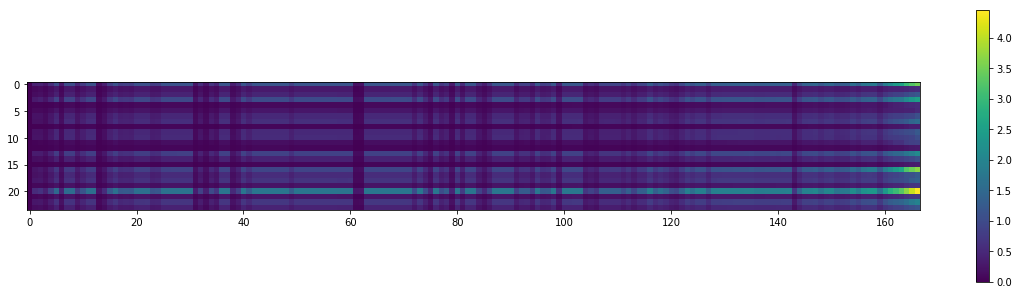

In [ ]:
plt.imshow(item_preds);
plt.colorbar()
plt.show()

In [ ]:
user0=item_preds.argsort()[usuario_ver]
user0

# los tres con mayor puntaje en la predic para este usuario
for aRepo in user0[-3:]:
    selRepo = df_repos[df_repos['repoId']==(aRepo+1)]
    print(selRepo['title'], 'puntaje:', item_preds[usuario_ver][aRepo])

164    nodejs / node
Name: title, dtype: object puntaje: 0.7915561710178032
165    OWASP / CheatSheetSeries
Name: title, dtype: object puntaje: 0.836463821866165
166    explosion / spaCy
Name: title, dtype: object puntaje: 0.8728575365246009


In [ ]:
get_mse(item_preds, ratings_train)

10.03834337791184

In [ ]:
get_mse(item_preds, ratings_test)

13.482774653471974

# Método 4: recomendacion por Correlacion

In [ ]:
average_rating = pd.DataFrame(df_ratings.groupby('repoId')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(df_ratings.groupby('repoId')['rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

mi_repo_ratings = df_matrix[62]
similar_to_mine = df_matrix.corrwith(mi_repo_ratings)
corr_mine = pd.DataFrame(similar_to_mine, columns=['pearsonR'])
corr_mine.dropna(inplace=True)
corr_summary = corr_mine.join(average_rating['rating'])
corr_summary[corr_summary['rating']>=1].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,rating
repoId,,
62,1.000000,7
87,0.341515,3
92,0.341515,3
95,0.341515,3
139,0.336601,1
138,0.336601,1
137,0.336601,1
140,0.336601,1
88,0.336601,1


In [ ]:
# Veamos uno de los recomendados
df_repos[df_repos['repoId'] == 92]

,repoId,title,categories,stars
91,92,joanby / python-ml-course,Curso de Introducción a Machine Learning con P...,156.0


# Método 5: Repo mas popular -sin collaborative filtering-

Esta es la manera básica y sin uso de machine learning de ofrecer recomendaciones. <br>
estas no serán personalizadas, serán iguales para cualquier usuario

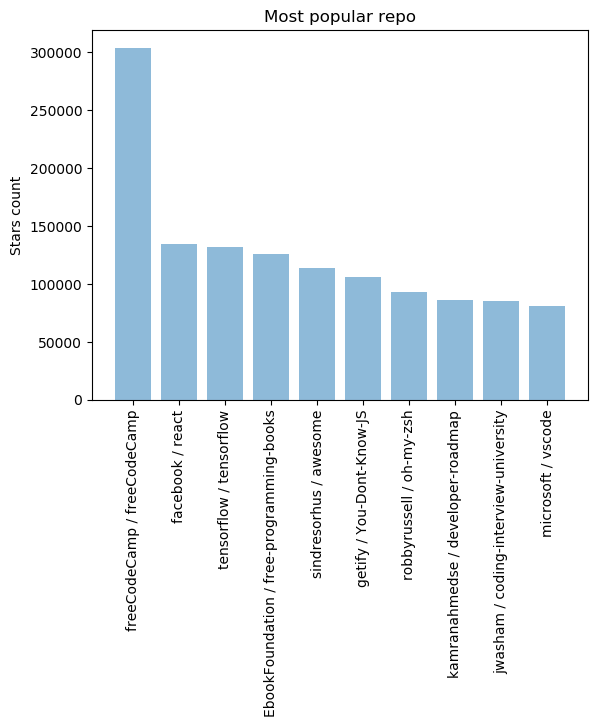

In [ ]:
popular_repo = df_repos[['title','stars']].groupby('stars').sum().reset_index()
popular_repo_top_20 = popular_repo.sort_values('stars', ascending=False).head(n=10)

plt.rcdefaults()

objects = (list(popular_repo_top_20['title']))
y_pos = np.arange(len(objects))
performance = list(popular_repo_top_20['stars'])

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Stars count')
plt.title('Most popular repo')

plt.show()